# Water Pumps: EDA
**Plan:**
1. Look for relationships between date recorded and geographical location.
2. Inspect distributions of numerical data.
3. Look for relations between groups of categorical data.

In [1]:
from collections import defaultdict
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.viz import viz

%matplotlib inline

## Load Cleaned Data

In [2]:
df = pd.read_csv('../data/clean/cleaned_data.csv', index_col='id')

In [3]:
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
0,non functional,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,functional,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59364 non-null  object 
 1   amount_tsh             59364 non-null  float64
 2   date_recorded          59364 non-null  object 
 3   funder                 59364 non-null  object 
 4   gps_height             59364 non-null  int64  
 5   installer              59364 non-null  object 
 6   longitude              59364 non-null  float64
 7   latitude               59364 non-null  float64
 8   wpt_name               59364 non-null  object 
 9   num_private            59364 non-null  int64  
 10  basin                  59364 non-null  object 
 11  subvillage             59364 non-null  object 
 12  region                 59364 non-null  object 
 13  region_code            59364 non-null  int64  
 14  district_code          59364 non-null  int64  
 15  lg

## EDA

### Dates and Geographical location
As indicated during data wrangling, it appears that the geographical locations were recorded twice. I will investigate on whether there is a relationship between when the record was made and the location.

In [5]:
geo_columns = ['longitude', 'latitude']
for column in geo_columns:
    print(df[column].value_counts().to_frame()[column].value_counts())

1       57443
2          72
1777        1
Name: longitude, dtype: int64
1       57445
2          71
1777        1
Name: latitude, dtype: int64


**Observations:**
* The majority of the geographical locations are unique.
* 71 geographical locations are recorded twice.
    * Could these pumps have been recorded on different days?
* One geographical location was recorded 1777 times.
    * This seems suspicious and is worth investigating.

In [6]:
geo_columns = ['longitude', 'latitude']
for column in geo_columns:
    print(df[column].value_counts().to_frame())

           longitude
0.000000        1777
33.010510          2
39.095087          2
39.099069          2
39.085965          2
...              ...
31.789709          1
37.095085          1
39.183964          1
34.341160          1
35.256844          1

[57516 rows x 1 columns]
               latitude
-2.000000e-08      1777
-2.465246e+00         2
-6.957328e+00         2
-6.991294e+00         2
-2.490324e+00         2
...                 ...
-3.263586e+00         1
-9.564592e+00         1
-8.519241e+00         1
-9.342734e+00         1
-2.598965e+00         1

[57517 rows x 1 columns]


**Question:** Do these geographical coordinates even fall within the borders of Tanzania?

A Google map inspection reveals that these coordinates fall within the Atlantic Ocean! Therefore, they must have been used to indicate pumps with missing geographical information.

In [7]:
1777 / len(df)

0.0299339667138333

Less than three percent of the pumps are missing geographical locations. This is small, but not insignificant.

### Data types
Inspecting the dataset above reveals that the categorical variable data types were lost when converting the file to a csv file. I will re-add them here.

In [8]:
categorical_vars = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                   'lga', 'ward', 'public_meeting', 'permit', 'construction_year',
                   'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
                   'payment_type', 'water_quality', 'quality_group', 'quantity_group', 'source', 'source_type', 
                    'source_class', 'waterpoint_type', 'waterpoint_type_group', 'scheme_management', 'status_group', 
                   'payment', 'quantity']

In [9]:
categorical_dict = {x: 'category' for x in categorical_vars}

In [10]:
df = df.astype(categorical_dict)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   status_group           59364 non-null  category
 1   amount_tsh             59364 non-null  float64 
 2   date_recorded          59364 non-null  object  
 3   funder                 59364 non-null  category
 4   gps_height             59364 non-null  int64   
 5   installer              59364 non-null  category
 6   longitude              59364 non-null  float64 
 7   latitude               59364 non-null  float64 
 8   wpt_name               59364 non-null  category
 9   num_private            59364 non-null  int64   
 10  basin                  59364 non-null  category
 11  subvillage             59364 non-null  category
 12  region                 59364 non-null  category
 13  region_code            59364 non-null  category
 14  district_code          59364 non-null 

## Distributions of numerical variables
**Plan:**
1. Create list of numerical column names.
2. Plot ECDF plots to visualize distributions. Use subplots.

In [12]:
num_cols_list = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
print(num_cols_list)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population']


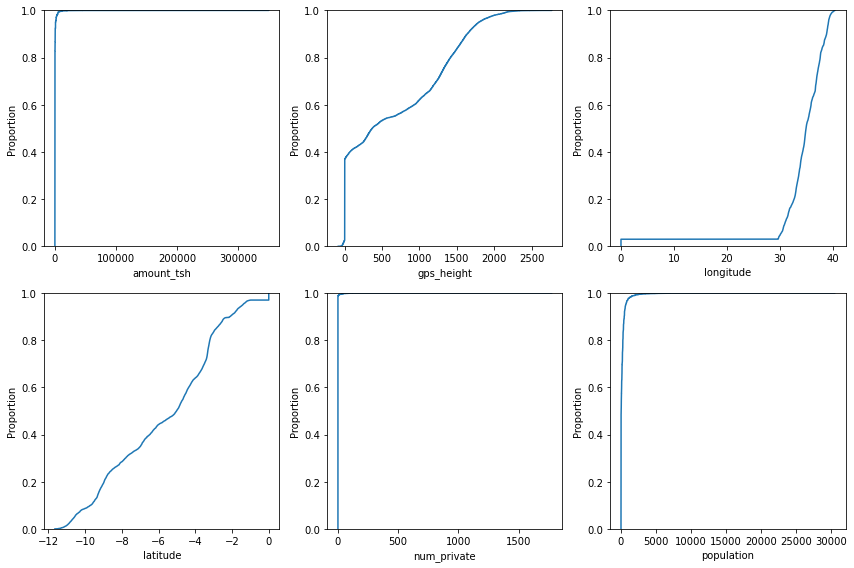

In [13]:
viz.plot_ecdfs(df, num_cols_list, 3)

Plot the ECDFs as before, but exclude all zero values.

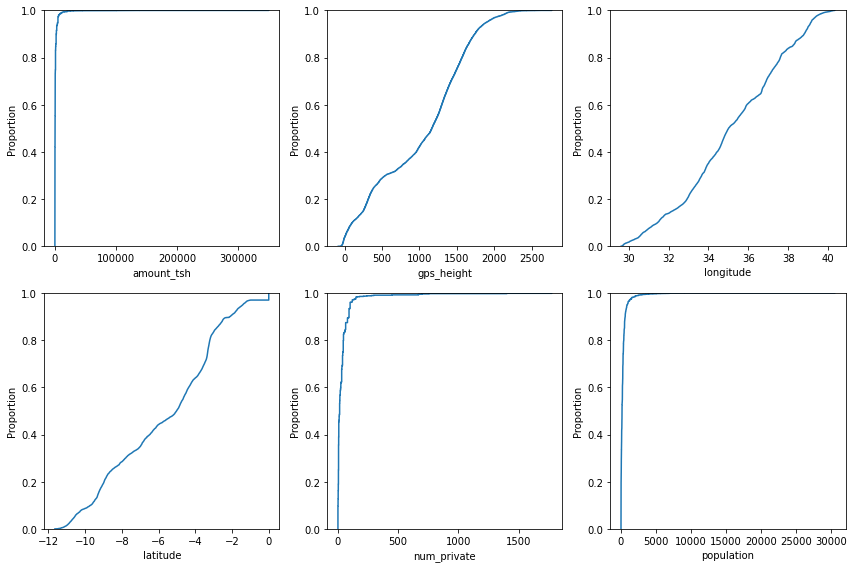

In [14]:
viz.plot_ecdfs(df, num_cols_list, 3, exclude_zeros=True)

**Observations:** The variables `amount_tsh`, `num_private`, and `population` show CDFs that are heavily skewed towards zero.

In [15]:
skewed_columns = ['amount_tsh', 'num_private', 'population']

In [16]:
df[skewed_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59364.0,317.843017,2998.473133,0.0,0.0,0.0,20.0,350000.0
num_private,59364.0,0.474429,12.239934,0.0,0.0,0.0,0.0,1776.0
population,59364.0,180.019086,471.604294,0.0,0.0,25.0,215.0,30500.0


One way to deal with these skewed values is to rescale these variables using a log function. I will do this and then relook at the distributions.

In [17]:
for column in skewed_columns:
    df[f'log_{column}'] = np.log(df[column]+1)

In [18]:
log_columns = [f'log_{x}' for x in skewed_columns]

In [19]:
df[log_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
log_amount_tsh,59364.0,1.586196,2.637172,0.0,0.0,0.000000,3.044522,12.765691
log_num_private,59364.0,0.035173,0.341284,0.0,0.0,0.000000,0.000000,7.482682
log_population,59364.0,2.821411,2.662085,0.0,0.0,3.258097,5.375278,10.325515


In [20]:
new_num_cols_list = [f'log_{x}' if x in skewed_columns else x for x in num_cols_list]

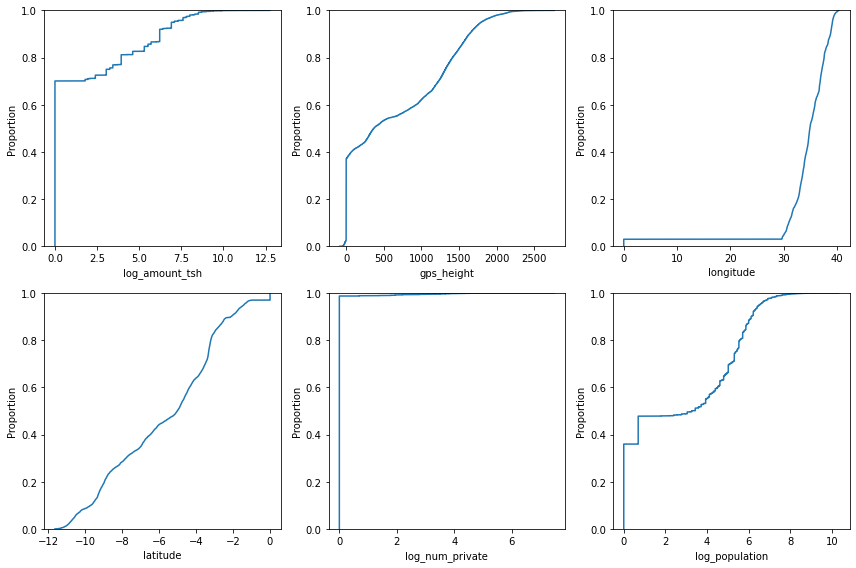

In [21]:
viz.plot_ecdfs(df, new_num_cols_list, 3)

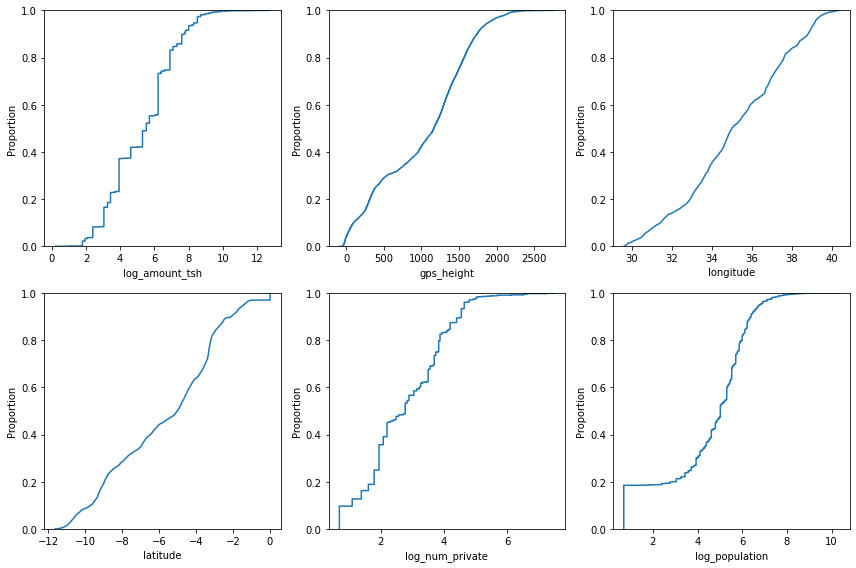

In [22]:
viz.plot_ecdfs(df, new_num_cols_list, 3, exclude_zeros=True)

**Observations:**
That looks much better.
* `log_population`
    * There are many values near zero, but then a nice, normal-looking curve afterwards.
* `log_amount_tsh`
    * A step-wise CDF, starting to increase around 2.
* I also think I only need to consider numerical values that are great than zero. Those that are equal to zero indicate missing values. But, before reaching this conclusion, I need to investigate if there is any relationship between the numerical variables and the response variable and whether the zero values make any difference or not.

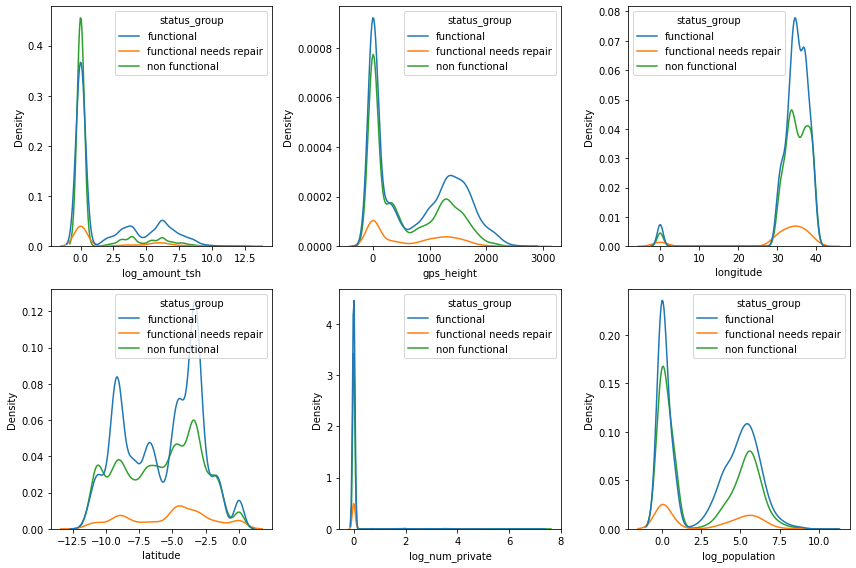

In [23]:
viz.plot_kdes(df, new_num_cols_list, 3)

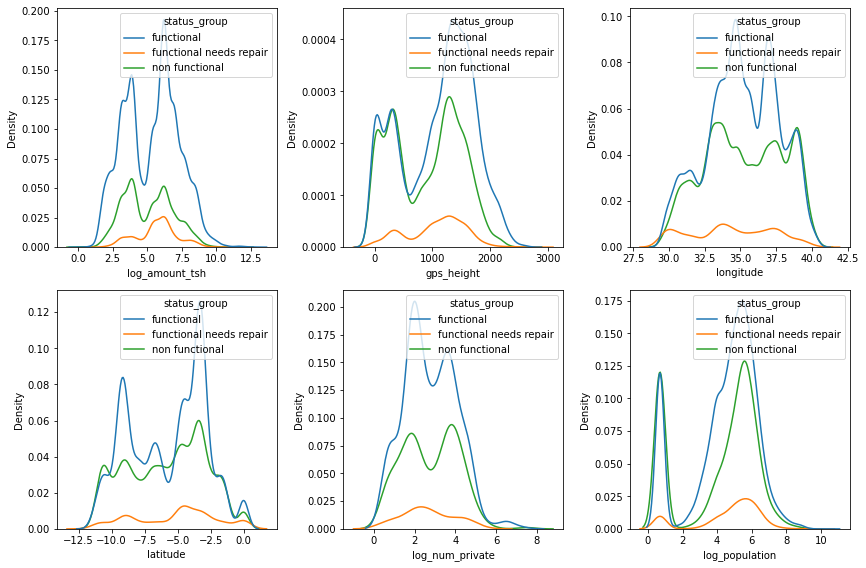

In [24]:
viz.plot_kdes(df, new_num_cols_list, 3, exclude_zeros=True)

In [25]:
# sns.pairplot(df[new_num_cols_list+['status_group']], hue='status_group', plot_kws={"s": 5})
# plt.show()

#### Handling zero values
* longitude
    * Set to median value.
* latitude
    * Set to median value.
* gps_height
    * Set to median value of heights within a binned geographical location.
* log_amount_tsh
    * There are a lot of zero values for the variable. This is the amount of water available at that waterpoint. Using the median `log_amount_tsh` value to resample the zero values seem problematic since there are so many zero values. Is it zero because there really isn't water available, or is it due to missing data?
* log_population
    * This exhibits the same problem as `log_amount_tsh`. But, maybe there are waterpumps in very rural areas.

**Correcting latitude and longitude:**

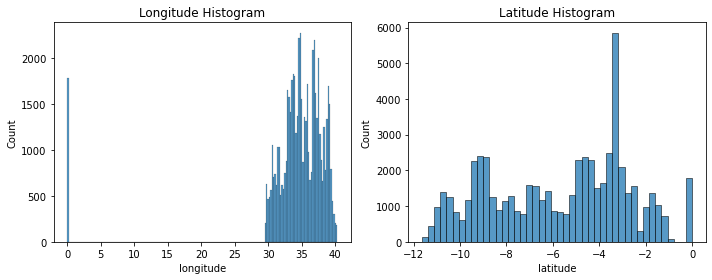

In [26]:
fix, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, column in enumerate(['longitude', 'latitude']):
    sns.histplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(f'{column.title()} Histogram')
plt.tight_layout()
plt.show()

**Plan:**
1. Find median values for non-zero latitude/longitude.
2. Set zero latitude/longitude values to median value.

In [27]:
location_columns = ['longitude', 'latitude']
for column in location_columns:
    non_zero = df[column] != 0.0
    median_location = np.median(df.loc[non_zero, column])
    df.loc[~non_zero, column] = median_location

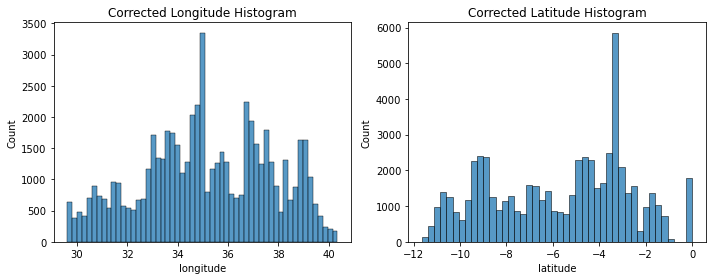

In [28]:
fix, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, column in enumerate(['longitude', 'latitude']):
    sns.histplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(f'Corrected {column.title()} Histogram')
plt.tight_layout()
plt.show()

**Observations:**
There is still an extreme value in latitude. This value is:

In [29]:
df['latitude'].max()

-2e-08

I will correct for these outlier values by setting any latitude value above -0.5 to the median latitude for the country.

In [30]:
limit = -0.5
outlier_latitudes = df['latitude'] > limit
print(f'There are {np.sum(outlier_latitudes)} values above the {limit} latitude.')
fraction_over_limit = np.sum(outlier_latitudes) / len(df)
print(f'There is a {fraction_over_limit:0.2f} fraction of values in this dataset that are about the latitude limit.')

There are 1777 values above the -0.5 latitude.
There is a 0.03 fraction of values in this dataset that are about the latitude limit.


In [31]:
df.loc[outlier_latitudes, 'latitude'] = df['latitude'].median()

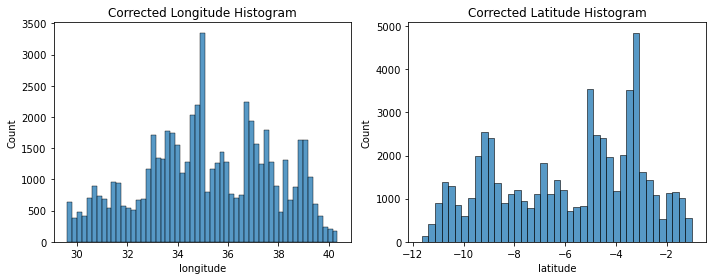

In [32]:
fix, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, column in enumerate(['longitude', 'latitude']):
    sns.histplot(x=column, data=df, ax=ax[i])
    ax[i].set_title(f'Corrected {column.title()} Histogram')
plt.tight_layout()
plt.show()

**Correct Heights:**
**Plan:**
1. Create a unique location identifier by combining latitude and longitude.
2. Bin DataFrame by this identifier.
3. Compute median heights for non-zero heights that fall within each bin.
4. Set zero values in each bin to the median height for that bin.

In [33]:
df['eq_distance'] = np.sqrt(df['latitude']**2 + df['longitude']**2)

In [34]:
num_bins = 1000
bin_labels = [f'bin_{x}' for x in range(num_bins)]
df['binned_distance'] = pd.cut(df['eq_distance'], bins=num_bins, labels=bin_labels)

In [35]:
total_bins_created = len(df['binned_distance'].unique())
bin_size = len(df) / total_bins_created
print(f'There are {total_bins_created} bins created.')
print(f'There average number of points per bin is {bin_size:0.3f}.')

There are 998 bins created.
There average number of points per bin is 59.483.


In [36]:
df['gps_height_corrected'] = df['gps_height']
for distance_bin in df['binned_distance'].unique().sort_values():
    nonzero_heights = (df['binned_distance'] == distance_bin) & (df['gps_height'] != 0)
    if np.sum(nonzero_heights) > 0:
        median_height = np.median(df.loc[nonzero_heights, 'gps_height'])
    zero_heights = (df['binned_distance'] == distance_bin) & (df['gps_height'] == 0)
    if np.sum(zero_heights) > 0:
        df.loc[zero_heights, 'gps_height_corrected'] = median_height

In [37]:
# sns.pairplot(df[['gps_height', 'gps_height_corrected', 'latitude', 'longitude', 'status_group']], hue='status_group', plot_kws={"s": 5})
# plt.show()

In [38]:
num_cols_list_corrected = [f'{x}_corrected' if x == 'gps_height' else x for x in new_num_cols_list]

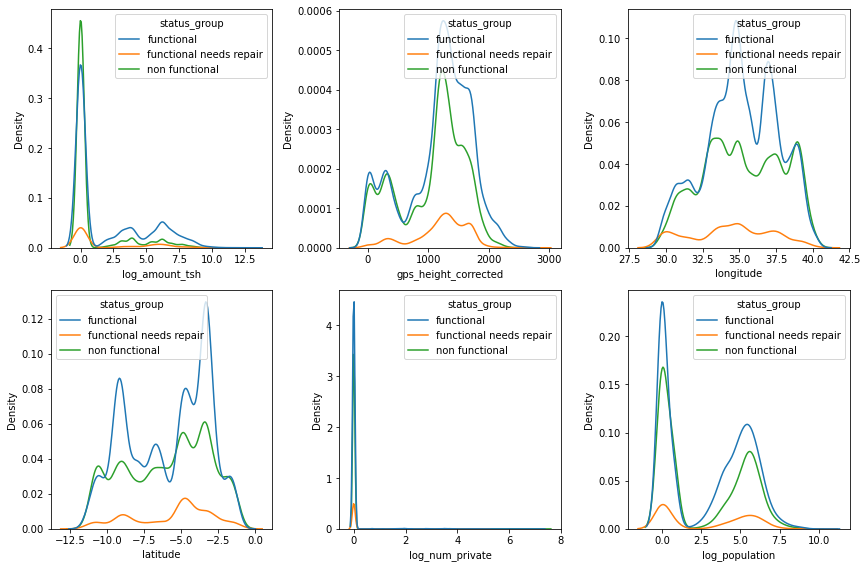

In [39]:
viz.plot_kdes(df, num_cols_list_corrected, 3)

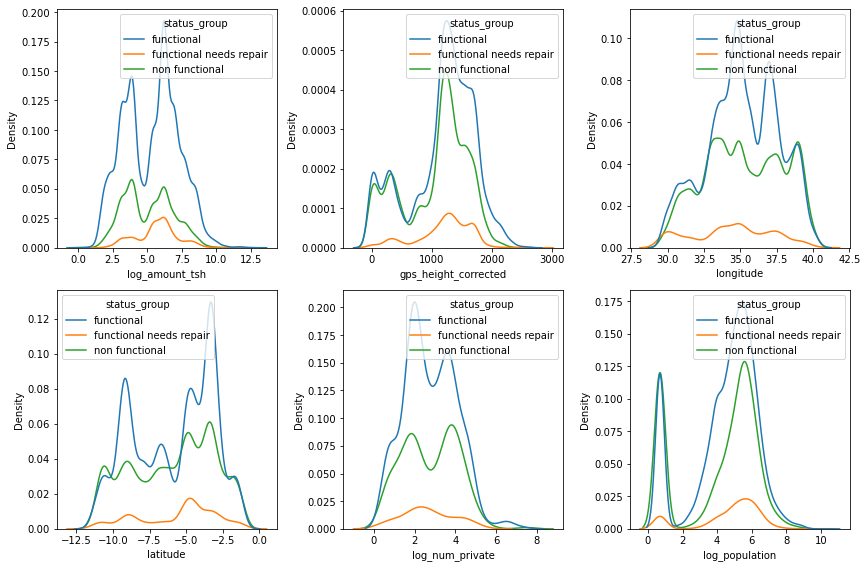

In [40]:
viz.plot_kdes(df, num_cols_list_corrected, 3, exclude_zeros=True)

**Population vs Location:**

**Question:**
How does population relate to geographical location? Can the location be used to interpolate missing population values?

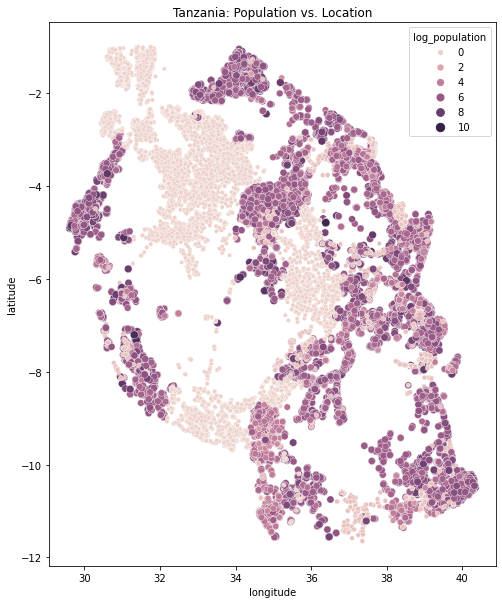

In [41]:
fix, ax = plt.subplots(figsize=(8, 10))
sns.scatterplot(x='longitude', y='latitude', size='log_population', hue='log_population', data=df, ax=ax)
ax.set_title('Tanzania: Population vs. Location')
plt.show()

**Obsevations:** There does appear to be swaths of the country where it is rural, which would explain areas of zero population. Regardless, there is no enough information to interpolate missing population values.

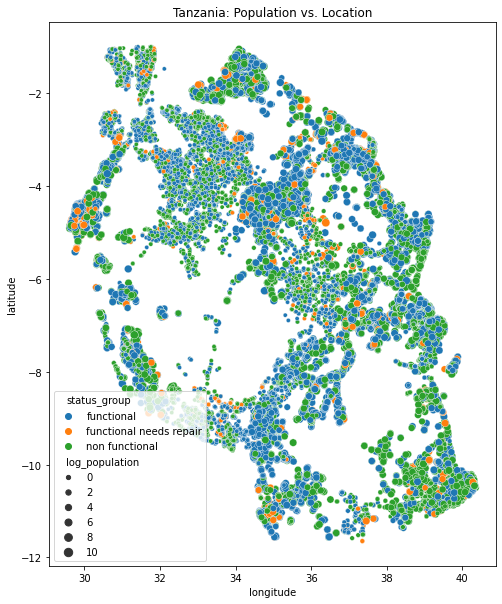

In [42]:
fix, ax = plt.subplots(figsize=(8, 10))
sns.scatterplot(x='longitude', y='latitude', size='log_population', hue='status_group', data=df, ax=ax)
ax.set_title('Tanzania: Population vs. Location')
plt.show()

**Observations:**
There does not appear to be any obvious trends in population nor geographical location with respect to the water pump functional status.

In [43]:
# sns.pairplot(df.loc[:, num_cols_list_corrected+['status_group']], hue='status_group', plot_kws={"s": 5})
# plt.show()

### Summarizing Categorical Data

In [44]:
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

In [45]:
df.loc[:, categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   status_group           59364 non-null  category
 1   funder                 59364 non-null  category
 2   installer              59364 non-null  category
 3   wpt_name               59364 non-null  category
 4   basin                  59364 non-null  category
 5   subvillage             59364 non-null  category
 6   region                 59364 non-null  category
 7   region_code            59364 non-null  category
 8   district_code          59364 non-null  category
 9   lga                    59364 non-null  category
 10  ward                   59364 non-null  category
 11  public_meeting         59364 non-null  category
 12  scheme_management      59364 non-null  category
 13  permit                 59364 non-null  category
 14  construction_year      59364 non-null 

In [61]:
category_counts = {column:len(df[column].value_counts()) for column in categorical_columns}
sorted_keys = sorted(category_counts, key=category_counts.get, reverse=True)
category_counts_sorted = {x:category_counts[x] for x in sorted_keys}
s_cat_count = pd.Series(category_counts_sorted)
s_cat_count.drop(['status_group', 'binned_distance'], inplace=True)

In [62]:
print('Category Counts:')
print(s_cat_count)

Category Counts:
wpt_name                 37400
subvillage               19288
installer                 2145
ward                      2092
funder                    1896
lga                        125
construction_year           55
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
scheme_management           12
management                  12
source                      10
basin                        9
water_quality                8
extraction_type_class        7
payment                      7
payment_type                 7
source_type                  7
waterpoint_type              7
quality_group                6
waterpoint_type_group        6
management_group             5
quantity                     5
quantity_group               5
source_class                 3
public_meeting               2
permit                       2
dtype: int64


**Plan:**
1. Related categories.
    * Merge or remove.
2. Convert categorical variables to numerical values.
3. Inspect categorical distributions wrt response variable.
4. One-hot encode numerical categorical variables.

In [64]:
df['scheme_management'].unique()

['VWC', 'None', 'Water Board', 'Private operator', 'WUA', ..., 'Other', 'Company', 'Parastatal', 'SWC', 'Trust']
Length: 12
Categories (12, object): ['VWC', 'None', 'Water Board', 'Private operator', ..., 'Company', 'Parastatal', 'SWC', 'Trust']

In [65]:
df['management'].unique()

['vwc', 'water board', 'private operator', 'wua', 'wug', ..., 'other', 'unknown', 'parastatal', 'trust', 'other - school']
Length: 12
Categories (12, object): ['vwc', 'water board', 'private operator', 'wua', ..., 'unknown', 'parastatal', 'trust', 'other - school']

In [66]:
df['management_group'].unique()

['user-group', 'commercial', 'other', 'unknown', 'parastatal']
Categories (5, object): ['commercial' < 'other' < 'parastatal' < 'unknown' < 'user-group']

### Related Catergorical variables
Inspecting the catergorical variables and their counts above, the following pairs of variables appear to be related:
* `region_code`, `region`
* `extraction_type`, `extraction_type_group`, `extraction_type_class`
* `scheme_management`, `management`
* `source`, `source_type`, `source_class`.
* `payment`, `payment_type`
* `waterpoint_type`, `waterpoint_type_group`
* `management`, `management_group`
* `quantity`, `quantity_group`

In [85]:
column_pairs = [
    ['region', 'region_code'],
    ['extraction_type_class', 'extraction_type_group'],
    ['extraction_type_group', 'extraction_type'],
    ['scheme_management', 'management'],
    ['scheme_management', 'management_group'],
    ['management', 'management_group'],
    ['source', 'source_type'],
    ['source_type', 'source_class'],
    ['payment', 'payment_type'],
    ['waterpoint_type_group', 'waterpoint_type'],
    ['quantity_group', 'quantity']
]

In [86]:
for column_pair in column_pairs:
    count_series = df.groupby(column_pair[0]).apply(lambda x: len(x[column_pair[1]].unique()))
    value_series = df.groupby(column_pair[0]).apply(lambda x: x[column_pair[1]].unique().astype('str'))
    df_cat_summary = pd.DataFrame({f'{column_pair[1]}_count': count_series, f'{column_pair[1]}_values': value_series})
    print(df_cat_summary)

               region_code_count region_code_values
region                                             
Arusha                         2            [2, 24]
Dar es Salaam                  1                [7]
Dodoma                         1                [1]
Iringa                         1               [11]
Kagera                         1               [18]
Kigoma                         1               [16]
Kilimanjaro                    1                [3]
Lindi                          3        [80, 8, 18]
Manyara                        1               [21]
Mara                           1               [20]
Mbeya                          1               [12]
Morogoro                       1                [5]
Mtwara                         3        [99, 90, 9]
Mwanza                         2           [19, 17]
Pwani                          3        [60, 6, 40]
Rukwa                          1               [15]
Ruvuma                         1               [10]
Shinyanga   

**Observations:**
* The following pairs of categorical variables show one-to-one relationships:
    * `management`, `management_group`
    * `payment`, `payment_type`
    * `quantity`, `quantity_group`
* These pairs of categorical variables do not show one-to-one relationships:
    * `region_code`, `region`
    * `extraction_type`, `extraction_type_group`, `extraction_type_class`
    * `scheme_management`, `management`
    * `source`, `source_type`, `source_class`.
    * `waterpoint_type`, `waterpoint_type_group`
* `scheme_management` shows many inconsistancies with `management` and `management_group`.
    
**Plan:**
1. For the one-to-one categorical variables, remove one of the columns to eliminate redundancy in the dataset.
2. For the additional categorical variables, select the variable that is most general in order to keep the model simple. If more information is needed, the more granular variables can be added back later. Evenso, there a couple of more granular columns that I would like to keep as I believe they will be more informative:
    * `source_type`
    * `waterpoint_type`
3. Leave in `scheme_management` since I am not sure which management column to trust.


#### Fix redundacies

In [81]:
redundant_columns = ['management', 'payment', 'quantity']
df_clean = df.drop(columns=redundant_columns)

#### Remove granular columns

In [87]:
granular_columns = ['region_code', 'extraction_type_class', 'extraction_type_group', 'source', 'source_class', 'waterpoint_type_group']
df_clean = df_clean.drop(columns=granular_columns)

### Label Categorical Variables
During modeling, categorical variables will need to be turned into numerical values. Therefore, I will map each categorical variable to a number using scikit-learn's `LabelEncoder()`.

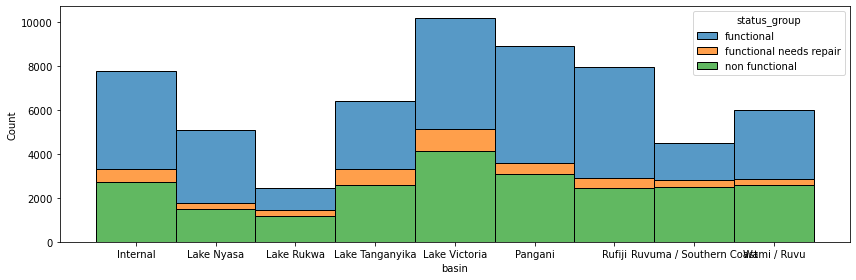

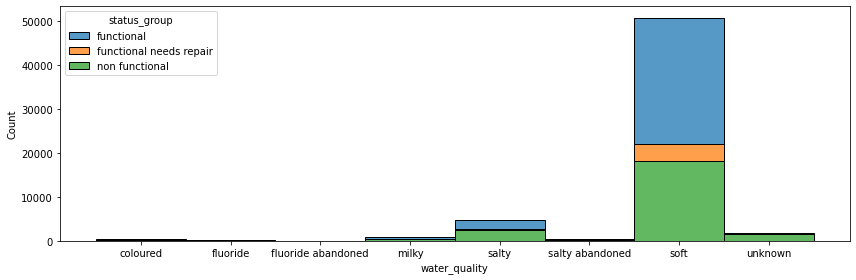

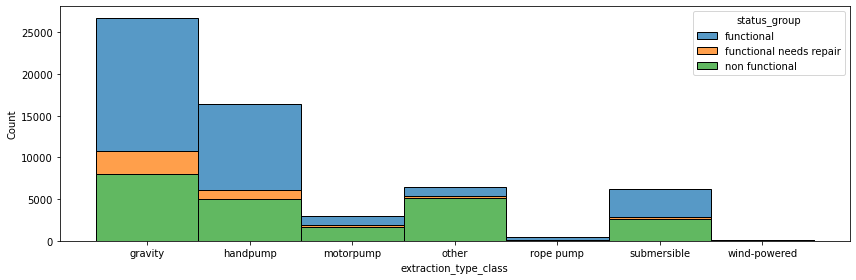

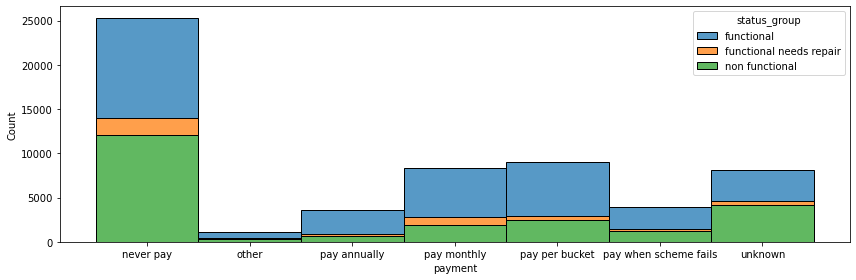

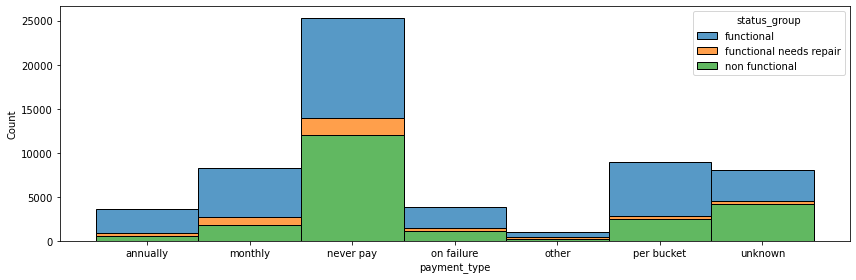

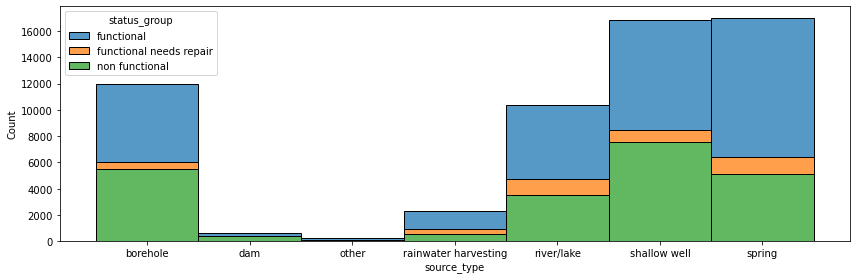

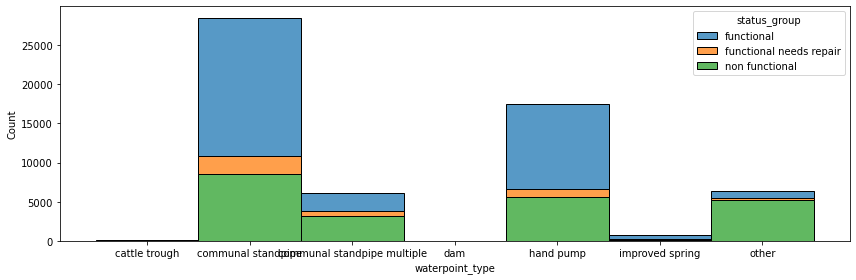

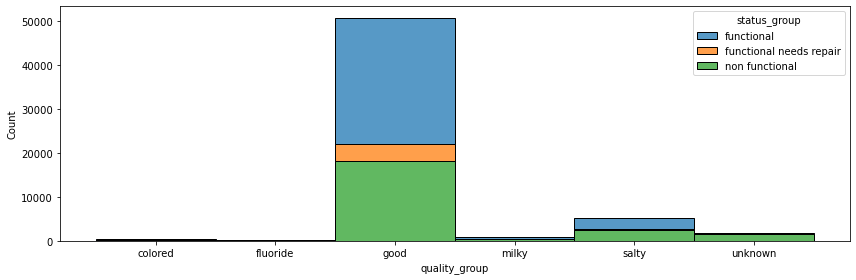

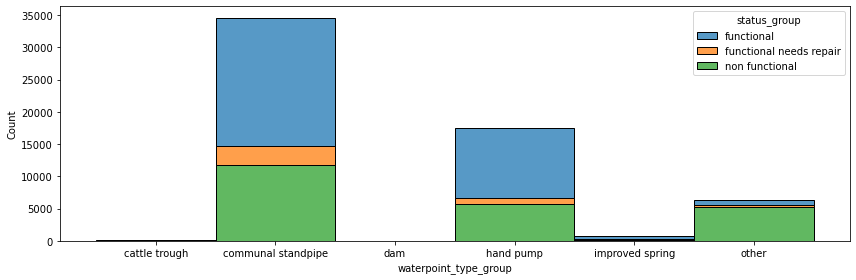

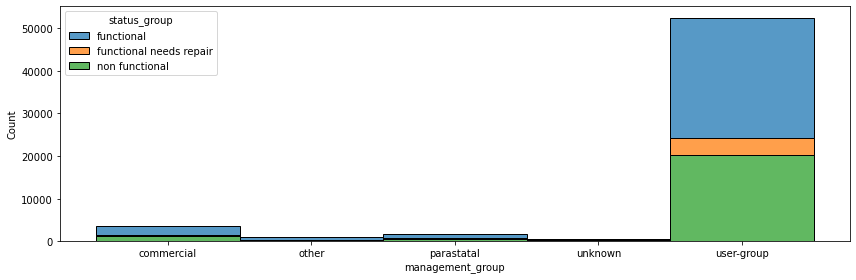

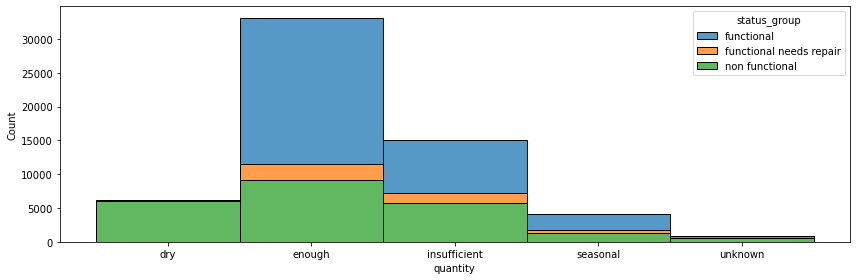

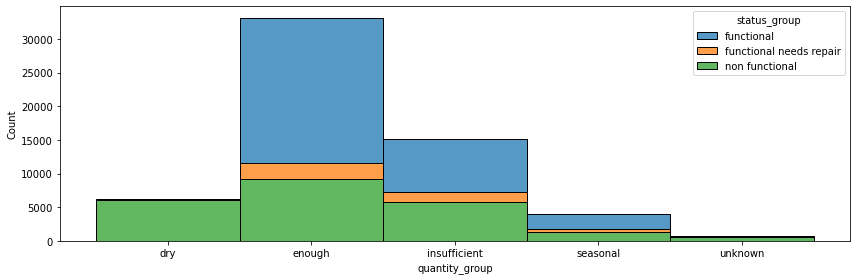

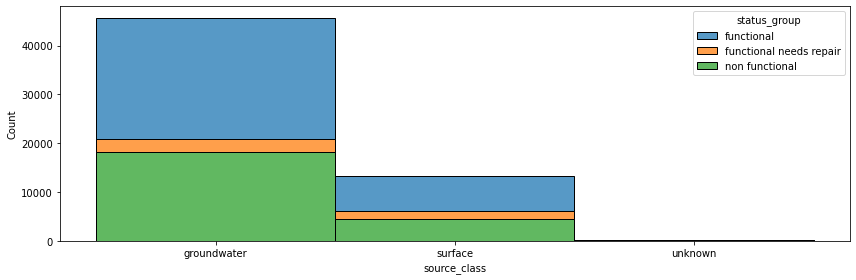

In [49]:
viz.plot_cat_hists(df, s_cat_count, 10)

### Response Variable

In [50]:
df['status_group'].value_counts(normalize=True)

functional                 0.54304
non functional             0.38429
functional needs repair    0.07267
Name: status_group, dtype: float64

**Obsesrvations:**
* The 'functional needs repair' status group only cosists of 7% of the dataset. But, since these pumps are still working, I will lump them with 'functional'.

In [51]:
df['status_group_combined'] = df['status_group'].replace({'functional needs repair': 'functional'})

In [52]:
df['status_group_combined'].value_counts(normalize=True)

functional        0.61571
non functional    0.38429
Name: status_group_combined, dtype: float64

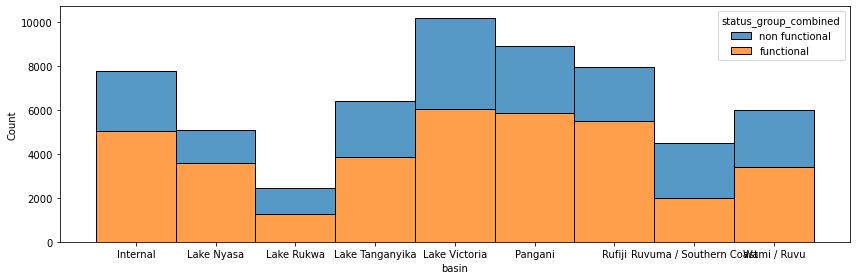

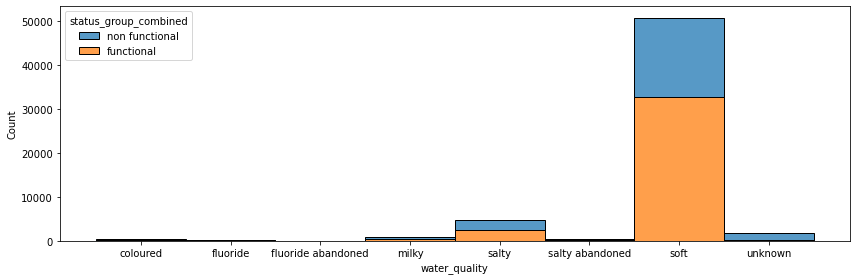

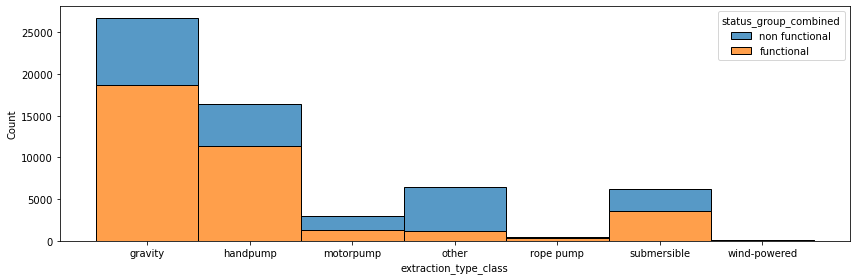

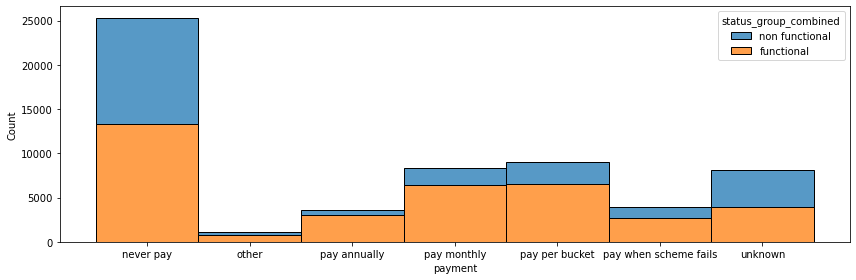

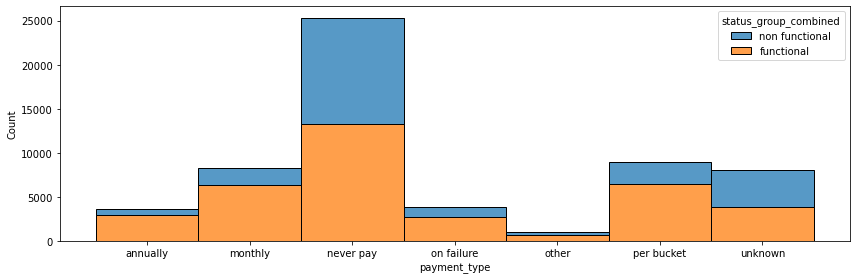

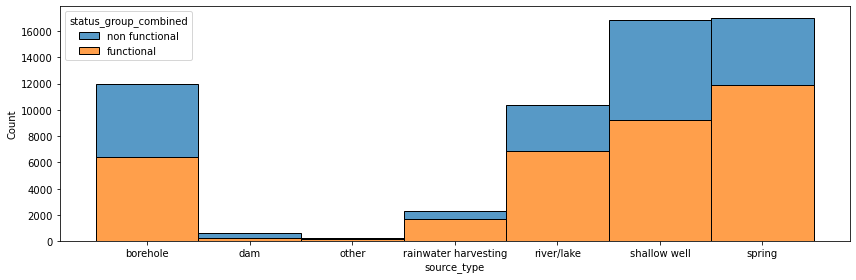

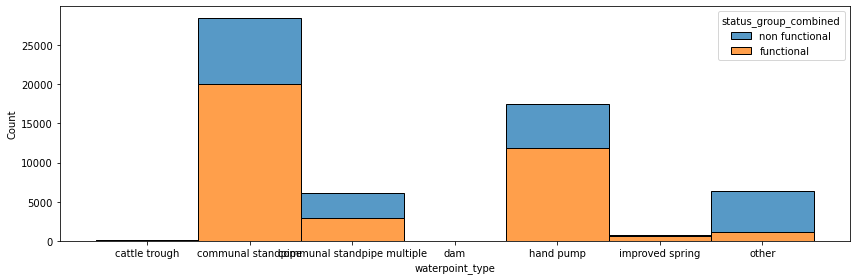

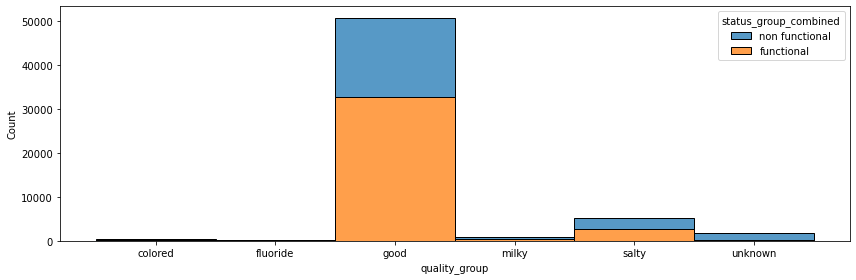

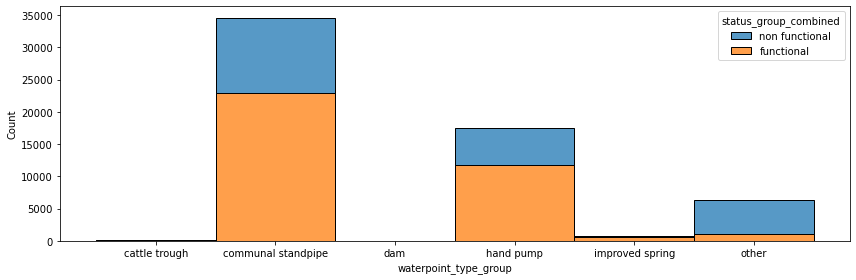

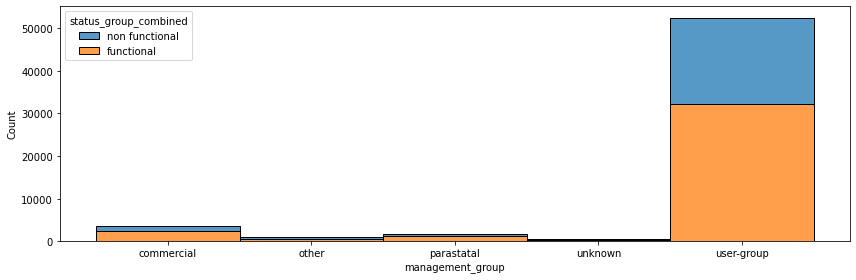

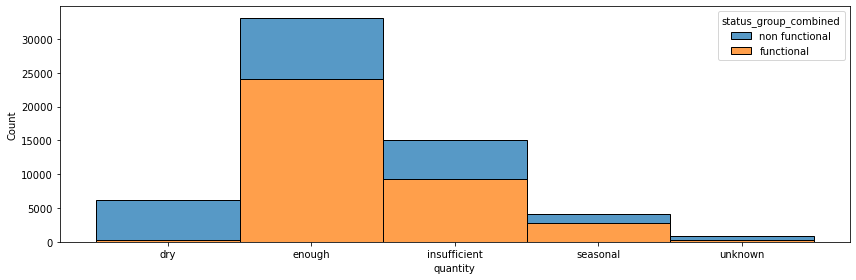

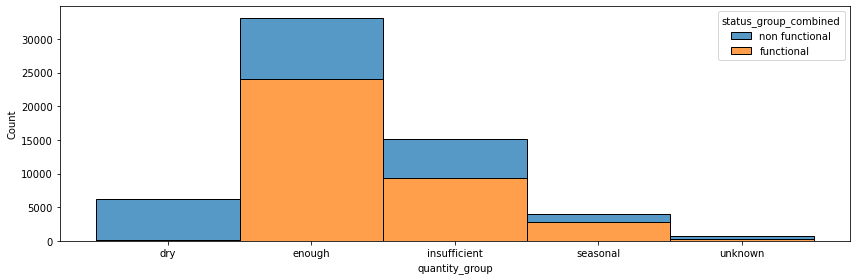

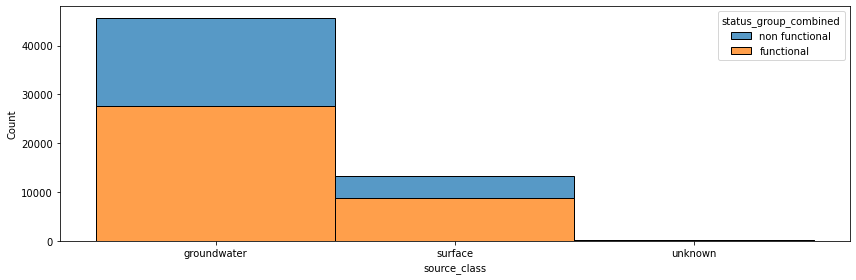

In [53]:
viz.plot_cat_hists(df, s_cat_count, 10, response_var='status_group_combined')

**Observations:**
* Payment appears to be a big factor on whether the pump is working or not. There is a larger fraction of non-functional water pumps for users who haven't paid.

**Questions:**
* How best to combine catergories? There are some categorical variables with small numbers of some categories. Can these be combined in an inteligent way?